In [1]:
# theory: I can enumerate all possible finite graphs
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from session15 import get_session15_endomaps

In [2]:
XG,YG = get_session15_endomaps()

In [3]:
def graph_to_N_x_N(G):
    M = nx.to_numpy_array(G)
    size = len(G.nodes)
    sq_size = size*size
    flat_M = np.reshape(M,(sq_size,))
    pows_2 = np.array([2**i for i in range(sq_size)])
    return (int(np.dot(flat_M,pows_2)),size)


In [4]:
from graphs import EMPTY_GRAPH,NAKED_ARROW,NAKED_DOT

In [5]:
[list(map(graph_to_N_x_N,[EMPTY_GRAPH,NAKED_DOT,NAKED_ARROW]))]

[[(0, 0), (0, 1), (2, 2)]]

In [6]:
from graphs import graph_sum,graph_product,make_C_N,graph_isometry


In [7]:
from numbertheory import reverse_zig_zag,from_zig_zag_N,check_bit

In [8]:
def graph_to_N(G):
    p = graph_to_N_x_N(G)
    return 2**p[1]+p[0]-1

In [9]:
[list(map(graph_to_N,[EMPTY_GRAPH,NAKED_DOT,NAKED_ARROW]))]

[[0, 1, 5]]

In [10]:
# now lets try to invert it
def graph_from_N(n):
    pow2 = 1
    size = 0
    bits = []
    while pow2 > n:
        bits.append(n % pow2)
        pow2 *= 2
        size += 1
    print(f"n:{n} bits:{bits}")

    if size == 0:
        print("empty graph!")
        return nx.DiGraph({})
        
    
    print(f"graph with {size} dots and bit_rep {bits}")
  #  bit_vec = np.array([[1 if check_bit(bit_rep,i) else 0 for i in range(size**size)]])
  #  print(f"bit_vec: {bit_vec}")
   # adj_mat = np.reshape(bit_vec,(size,size))
    adj_mat = np.reshape(bits,(size,size))
    return nx.from_numpy_array(adj_mat,create_using=nx.DiGraph())
    

In [11]:
TEST_GRAPHS = [
    EMPTY_GRAPH,
    NAKED_DOT,
    NAKED_ARROW,
    graph_sum(NAKED_DOT,NAKED_DOT),
    graph_sum(NAKED_DOT,NAKED_ARROW),
    graph_product(NAKED_ARROW,NAKED_ARROW)
]

Nodes = 2 x 2 -> 4
["['s', 's']", "['s', 't']", "['t', 's']", "['t', 't']"] 4
[("['s', 's']", "['t', 't']")] 1


[]


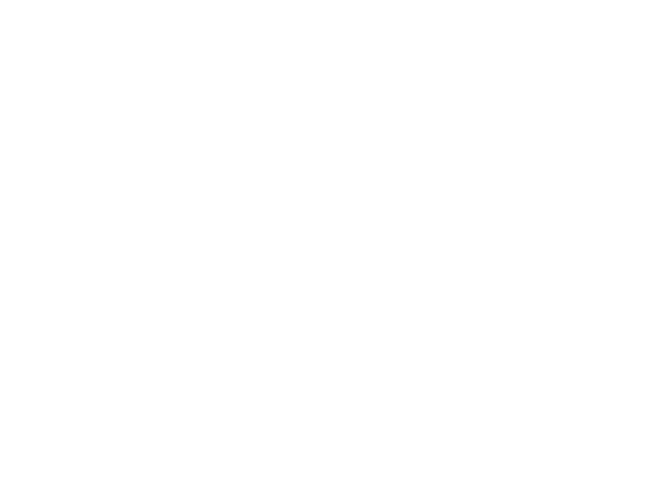

Pair (0, 0) -> Graph 0


In [ ]:
def draw_and_print(G):
    m = nx.to_numpy_array(g)
    print(m)
    nx.draw(g)
    plt.show()

for g in TEST_GRAPHS:
    draw_and_print(g)
    p = graph_to_N_x_N(g)
    n = graph_to_N(g)
    print(f"Pair {p} -> Graph {n}")
    rg = graph_from_N(n)
    assert graph_isometry(rg,g)

In [ ]:
for i in range(3):
    for j in range(2**i):
        print(f"i:{i} j:{j}")
        draw_and_print(graph_from_N_x_N(j,i))

In [ ]:
nx.draw(graph_from_N_x_N((2,2)))

In [ ]:
def graph_from_N(n):
    size = np.floor(np.log2(n))

In [ ]:
for i in range(13):
    print(f"i:{i}")
    g = graph_from_N(i)
    draw_and_print(g)


In [ ]:
nx.draw(g10[1])

In [ ]:
nx.draw(g10[2])

In [ ]:
nx.draw(g10[3])

In [ ]:
from graphs import make_C_N
C3 = make_C_N(3)

In [ ]:
def maps_in_S_between_graphs(GA,GB):
    a_size,b_size 